In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn

In [67]:
### Predicting popularity based on not quantiled cuts
## Optimal number of neighbors = 500

n_neighbors = 101

train = pd.read_csv('~/Box/DSCI303/archive/final_popularity_qcut_train.csv')
test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_qcut_test.csv')

drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'explicit', 'key', 'id', 'duration_ms', 'year',
                 'year_bins','mode', 'popularity_cut', 'release_date', 'artists', 'name', 'popularity']
train = train.drop(drop_columns, axis =1)

features = ['acousticness', 'energy', 'instrumentalness',
        'loudness', 'speechiness', 'tempo']
### Danceability, valence, liveness can be improved
# target = ['year_bins']
# target = ['popularity_cut']
target = ['popularity_qcut']

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]


n_classes = 4

<ipython-input-68-5b1812d69a93>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


0.5319286681184157


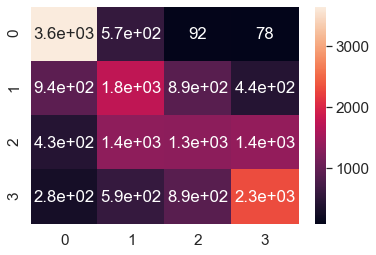

In [68]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')

knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

print(acc_knn)

df_cm = confusion_matrix(y_test, knn.predict(X_test))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()

In [70]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      4383
           1       0.41      0.44      0.42      4014
           2       0.42      0.30      0.35      4513
           3       0.55      0.57      0.56      4081

    accuracy                           0.53     16991
   macro avg       0.52      0.53      0.52     16991
weighted avg       0.52      0.53      0.52     16991



In [71]:
### Predicting popularity based on quantiled cuts
## Optimal number of neighbors = 50

n_neighbors = 101

train = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_train.csv')
test = pd.read_csv('~/Box/DSCI303/archive/final_popularity_cut_test.csv')

drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'explicit', 'key', 'id', 'duration_ms', 'year',
                 'year_bins','mode', 'popularity_qcut', 'release_date', 'artists', 'name', 'popularity']
train = train.drop(drop_columns, axis =1)

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
        'loudness', 'speechiness', 'tempo','valence', 'liveness']
# target = ['year_bins']
target = ['popularity_cut']
# target = ['popularity_qcut']

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

<ipython-input-72-5b1812d69a93>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


0.6605850155964923


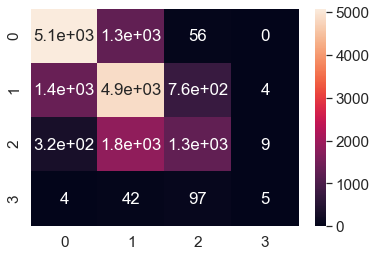

In [72]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')

knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

print(acc_knn)

df_cm = confusion_matrix(y_test, knn.predict(X_test))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()

In [73]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      6414
           1       0.61      0.70      0.65      6991
           2       0.58      0.37      0.45      3438
           3       0.28      0.03      0.06       148

    accuracy                           0.66     16991
   macro avg       0.55      0.47      0.48     16991
weighted avg       0.65      0.66      0.65     16991



In [74]:
n_neighbors = 501

train = pd.read_csv('~/Box/DSCI303/archive/final_year_train.csv')
test = pd.read_csv('~/Box/DSCI303/archive/final_year_test.csv')

drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'explicit', 'key', 'id', 'duration_ms', 'year',
                 'popularity_cut','mode', 'popularity_qcut', 'release_date', 'artists', 'name', 'popularity']
train = train.drop(drop_columns, axis =1)

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
        'loudness', 'speechiness', 'tempo','valence', 'liveness']
target = ['year_bins']
# target = ['popularity_cut']
# target = ['popularity_qcut']

X_train = train[features]
X_test = test[features]

y_train = train[target]
y_test = test[target]

<ipython-input-75-5b1812d69a93>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


0.6439291389559179


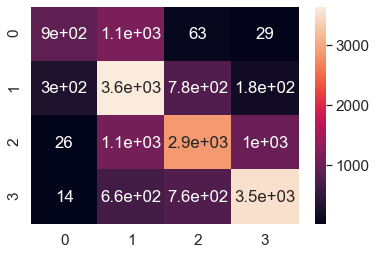

In [75]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')

knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

print(acc_knn)

df_cm = confusion_matrix(y_test, knn.predict(X_test))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size

plt.show()

In [76]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.42      0.54      2135
           1       0.56      0.74      0.64      4890
           2       0.64      0.57      0.61      5000
           3       0.74      0.71      0.73      4966

    accuracy                           0.64     16991
   macro avg       0.67      0.61      0.63     16991
weighted avg       0.66      0.64      0.64     16991

